## Quick Financial Report:

### Evolución de la Cartera de Créditos en Cajas Municipales

#### 1. Resumen Ejecutivo

##### En el último trimestre de 2024, el sector de las Cajas Municipales ha experimentado cambios significativos en la composición de su cartera de créditos, impulsados principalmente por la aplicación de la Resolución SBS N° 2368-2023. Esta normativa ha generado variaciones en la clasificación de los clientes, afectando la migración entre segmentos, los niveles de morosidad y la distribución de la cartera por tipo de crédito.

##### El presente informe tiene como objetivo analizar la evolución reciente de la cartera de créditos en las Cajas Municipales, evaluando el impacto en la migración de clientes, los niveles de morosidad y la clasificación crediticia. A través de un enfoque comparativo, se presentan tendencias clave y su implicancia en la estabilidad financiera del sector, proporcionando información relevante para la toma de decisiones estratégicas.

  #### 2. Situación Actual de la Cartera de Clientes

##### La evolución de la cartera de créditos en las Cajas Municipales muestra cambios significativos en la distribución de los saldos por tipo de empresa, influenciados por la aplicación de la Resolución SBS N° 2368-2023. A continuación, se presenta un análisis de los principales cambios en los saldos de colocaciones para los segmentos de Microempresa, Pequeña Empresa y Mediana Empresa, comparando su evolución en los últimos meses.

##### 2.1 Evolución de los Saldos de Crédito por Tipo de Empresa

In [8]:
import pandas as pd

In [9]:
ruta = r'C:\Users\USER\Downloads\SBS'
nombre = 'DATA_REPORT.xlsx'
df = pd.read_excel(f'{ruta}//{nombre}')

In [10]:
cajas =df[df.columns[1] ].value_counts().index.tolist()
tipo_credito = df[df.columns[2] ].value_counts().index.tolist()
#Eliminamos 'TOTAL CAJAS MUNICIPALES DE AHORRO Y CREDITO',
del cajas[12]

In [11]:
#SALDO DE CARTERA A SEPTIEMBRE
cm_sep = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2024-09-01')][[df.columns[6]]].iloc[0,0]
    cm_sep[m] = analisis
cm_sep1 = list(cm_sep.values())

In [12]:
#SALDO DE CARTERA A OCT-DICIEMBRE
meses = ['2024-10-01','2024-11-01','2024-12-01']
cm_oct_dic = {}
data_mes = []
for m in range(7):
    data_mes = []
    for n in range(3):
        analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == meses[n])][[df.columns[6]]].iloc[0,0]
        data_mes.append(analisis)
        cm_oct_dic[m] = data_mes
#SALDO PROMEDIO
cm_oct_dic_mean = []
for m in range(7):
    valor = sum(cm_oct_dic[m])/len(cm_oct_dic[m])
    cm_oct_dic_mean.append(valor)

In [13]:
#GENERAMOS TABLA DE RESULTADOS
tabla1 = pd.DataFrame({'Tipo Empresa':tipo_credito, 
                       'Saldo Colocaciones Sep-24':cm_sep1, 'Saldo Promedio Oct-Dic 24': cm_oct_dic_mean})
tabla1[[tabla1.columns[1], tabla1.columns[2]]] = tabla1[[tabla1.columns[1], tabla1.columns[2]]].applymap(lambda x: x/1000)
tabla1['Variacion R02368-2023'] = ((tabla1[tabla1.columns[2]] / tabla1[tabla1.columns[1]]) - 1)*100
tabla1[[tabla1.columns[1], tabla1.columns[2], tabla1.columns[3]]] = tabla1[[tabla1.columns[1], tabla1.columns[2], tabla1.columns[3]]].applymap(lambda x: f"{x:,.2f}")
orden_deseado = ['Corporativos', 'Grandes Empresas', 'Medianas Empresas',
                 'Pequeñas Empresas', 'Micro Empresas', 'Hipotecarios', 'Consumo']
# Convertir la columna en una categoría con el orden específico
tabla1["Tipo Empresa"] = pd.Categorical(tabla1["Tipo Empresa"], categories=orden_deseado, ordered=True)
# Ordenar el DataFrame
tabla1 = tabla1.sort_values("Tipo Empresa").reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8388\2781243562.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla1[[tabla1.columns[1], tabla1.columns[2]]] = tabla1[[tabla1.columns[1], tabla1.columns[2]]].applymap(lambda x: x/1000)
C:\Users\USER\AppData\Local\Temp\ipykernel_8388\2781243562.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla1[[tabla1.columns[1], tabla1.columns[2], tabla1.columns[3]]] = tabla1[[tabla1.columns[1], tabla1.columns[2], tabla1.columns[3]]].applymap(lambda x: f"{x:,.2f}")


##### En el último trimestre de 2024, los saldos de colocaciones han presentado las siguientes variaciones:

In [15]:
tabla1

,Tipo Empresa,Saldo Colocaciones Sep-24,Saldo Promedio Oct-Dic 24,Variacion R02368-2023
0,Corporativos,199.00,225.49,13.31
1,Grandes Empresas,64.36,88.28,37.18
2,Medianas Empresas,"1,752.60",229.71,-86.89
3,Pequeñas Empresas,"18,099.73","22,842.77",26.21
4,Micro Empresas,"6,642.88","4,108.09",-38.16
5,Hipotecarios,"1,588.86","1,587.32",-0.10
6,Consumo,"7,070.47","7,137.28",0.94


##### Análisis de los resultados:

##### - Microempresas: El saldo total pasó de S/6,642.88 millones a S/4,108.09 millones, lo que representa una variación de -38.16%. Esta disminución refleja una migración significativa de clientes hacia otros segmentos, posiblemente debido a la reclasificación de clientes bajo la nueva normativa.

##### - Se observa un incremento en el saldo de S/18,099.73 millones a S/22,842.77 millones, equivalente a una variación de 26.21%. Este aumento sugiere que muchas medianas empresas han sido reclasificadas como pequeñas empresas, lo que ha generado un ajuste en la estructura de la cartera.

##### - Mediana Empresa: Se evidencia una disminución significativa del saldo de S/1,752.60 millones a S/229.71 millones, con una variación de -86.89%. Este comportamiento confirma la migración de clientes de mediana empresa hacia el segmento de pequeñas empresas.

##### Este comportamiento refleja la migración de clientes entre segmentos, particularmente el traslado de clientes de Mediana Empresa hacia Pequeña Empresa, lo que ha generado un ajuste en la estructura de la cartera.

##### 2.2 Comparación Interanual y Tendencias

In [18]:
#SALDO DE CARTERA A OCT-DICIEMBRE DEL 2023
meses = ['2023-10-01','2023-11-01','2023-12-01']
cm_oct_dic_23 = {}
data_mes = []
for m in range(7):
    data_mes = []
    for n in range(3):
        analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == meses[n])][[df.columns[6]]].iloc[0,0]
        data_mes.append(analisis)
        cm_oct_dic_23[m] = data_mes
#SALDO PROMEDIO
cm_oct_dic_mean_23 = []
for m in range(7):
    valor = sum(cm_oct_dic_23[m])/len(cm_oct_dic_23[m])
    cm_oct_dic_mean_23.append(valor)

In [19]:
#GENERAMOS TABLA DE RESULTADOS
tabla2 = pd.DataFrame({'Tipo Empresa':tipo_credito, 
                       'Saldo Promedio Oct-Dic 23':cm_oct_dic_mean_23, 'Saldo Promedio Oct-Dic 24': cm_oct_dic_mean})
tabla2[[tabla2.columns[1], tabla2.columns[2]]] = tabla2[[tabla2.columns[1], tabla2.columns[2]]].applymap(lambda x: x/1000)
tabla2['Diferencia R02368-2023'] = tabla2[tabla2.columns[2]] - tabla2[tabla2.columns[1]]
tabla2['Variacion R02368-2023'] = ((tabla2[tabla2.columns[2]] / tabla2[tabla2.columns[1]]) - 1)*100
tabla2[[tabla2.columns[1], tabla2.columns[2], tabla2.columns[3],tabla2.columns[4]]] = tabla2[[tabla2.columns[1], tabla2.columns[2], tabla2.columns[3],tabla2.columns[4]]].applymap(lambda x: f"{x:,.2f}")
# Convertir la columna en una categoría con el orden específico
tabla2["Tipo Empresa"] = pd.Categorical(tabla2["Tipo Empresa"], categories=orden_deseado, ordered=True)
# Ordenar el DataFrame
tabla2 = tabla2.sort_values("Tipo Empresa").reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8388\1492869367.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla2[[tabla2.columns[1], tabla2.columns[2]]] = tabla2[[tabla2.columns[1], tabla2.columns[2]]].applymap(lambda x: x/1000)
C:\Users\USER\AppData\Local\Temp\ipykernel_8388\1492869367.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla2[[tabla2.columns[1], tabla2.columns[2], tabla2.columns[3],tabla2.columns[4]]] = tabla2[[tabla2.columns[1], tabla2.columns[2], tabla2.columns[3],tabla2.columns[4]]].applymap(lambda x: f"{x:,.2f}")


##### Al comparar los saldos actuales con el mismo periodo del año anterior, se identifican los siguientes cambios:

In [21]:
tabla2

,Tipo Empresa,Saldo Promedio Oct-Dic 23,Saldo Promedio Oct-Dic 24,Diferencia R02368-2023,Variacion R02368-2023
0,Corporativos,188.83,225.49,36.66,19.42
1,Grandes Empresas,58.41,88.28,29.87,51.15
2,Medianas Empresas,"1,894.00",229.71,"-1,664.29",-87.87
3,Pequeñas Empresas,"17,782.09","22,842.77","5,060.68",28.46
4,Micro Empresas,"6,928.74","4,108.09","-2,820.65",-40.71
5,Hipotecarios,"1,569.50","1,587.32",17.83,1.14
6,Consumo,"7,456.34","7,137.28",-319.06,-4.28


##### Interpretación de las tendencias:

##### - Microempresas: La variación interanual muestra una reducción de S/-2,820.65 millones, equivalente a -40.71%. Este descenso indica una migración de clientes hacia otros segmentos, posiblemente debido a la reclasificación y a la búsqueda de mejores condiciones crediticias.

##### - Pequeñas Empresas: El incremento de S/5,060.68 millones (28.46%) refleja la absorción de clientes provenientes de las medianas empresas, lo que ha fortalecido este segmento.

##### - Medianas Empresas: La caída de S/-1,664.29 millones (-87.87%) confirma la migración masiva de clientes hacia el segmento de pequeñas empresas, lo que ha generado un ajuste significativo en la estructura de la cartera.

##### Estos datos permiten identificar tendencias clave, como el crecimiento o contracción de ciertos segmentos, y su impacto en la estructura de la cartera de las Cajas Municipales.

##### 2.3 Migración de Clientes entre Segmentos

##### Uno de los efectos más significativos de la Resolución SBS N° 2368-2023 en las Cajas Municipales ha sido la migración de clientes de Mediana Empresa a Pequeña Empresa. Este fenómeno ha impactado la concentración de la cartera y la segmentación del riesgo, modificando la estructura del portafolio crediticio.

In [25]:
#NUMERO DE CLIENTES A OCT-DICIEMBRE
meses = ['2024-09-01','2024-10-01','2024-11-01','2024-12-01']
nd_set_dic = {}
data_mes = []
for n in range(4):
    data_mes = []
    for m in range(7):
        analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == meses[n])][[df.columns[7]]].iloc[0,0]
        data_mes.append(analisis)
        nd_set_dic[n] = data_mes

In [26]:
#GENERAMOS TABLA DE RESULTADOS
tabla3 = pd.DataFrame({'Tipo Empresa':tipo_credito, 
                       'Septiembre-2024':nd_set_dic[0], 
                       'Octubre-2024':nd_set_dic[1],
                       'Noviembre-2024':nd_set_dic[2],
                       'Diciembre-2024':nd_set_dic[3]})
tabla3['Diferencia R02368-2023'] = tabla3[tabla3.columns[4]] - tabla3[tabla3.columns[1]]
tabla3['Variacion R02368-2023'] = ((tabla3[tabla3.columns[4]] / tabla3[tabla3.columns[1]]) - 1)*100
tabla3[[tabla3.columns[1], tabla3.columns[2], 
        tabla3.columns[3],tabla3.columns[4],
        tabla3.columns[5],tabla3.columns[6]]] = tabla3[[tabla3.columns[1], tabla3.columns[2], tabla3.columns[3],
                                                        tabla3.columns[4],tabla3.columns[5],tabla3.columns[6]]].applymap(lambda x: f"{x:,.2f}")
# Convertir la columna en una categoría con el orden específico
tabla3["Tipo Empresa"] = pd.Categorical(tabla3["Tipo Empresa"], categories=orden_deseado, ordered=True)
# Ordenar el DataFrame
tabla3 = tabla3.sort_values("Tipo Empresa").reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8388\3161460176.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla3.columns[4],tabla3.columns[5],tabla3.columns[6]]].applymap(lambda x: f"{x:,.2f}")


##### Análisis de Clientes que Pasaron de Mediana Empresa a Pequeña Empresa

In [28]:
tabla3

,Tipo Empresa,Septiembre-2024,Octubre-2024,Noviembre-2024,Diciembre-2024,Diferencia R02368-2023,Variacion R02368-2023
0,Corporativos,7.00,9.00,9.00,9.00,2.00,28.57
1,Grandes Empresas,32.00,45.00,47.00,50.00,18.00,56.25
2,Medianas Empresas,"5,970.00",387.00,467.00,525.00,"-5,445.00",-91.21
3,Pequeñas Empresas,"442,293.00","553,911.00","561,388.00","566,952.00","124,659.00",28.18
4,Micro Empresas,"1,109,183.00","1,015,227.00","1,015,119.00","1,015,416.00","-93,767.00",-8.45
5,Hipotecarios,"21,003.00","20,980.00","20,937.00","20,884.00",-119.00,-0.57
6,Consumo,"831,481.00","841,037.00","847,203.00","845,165.00","13,684.00",1.65


##### Análisis de la migración de clientes:

##### Mediana Empresa: Durante el último trimestre de 2024, se ha observado una reducción en el número de clientes clasificados en este segmento. 5,445 clientes migraron a otras tipologías de créditos, lo que representa una reducción del 91.21% respecto a septiembre.

##### Microempresas: 93,767 clientes migraron a otras tipologías de créditos, lo que representa una reducción del 8.45% respecto a septiembre.

##### Pequeñas Empresas: 124,659 clientes migraron a este segmento, lo que representa un aumento del 28.18% respecto a septiembre.

##### 3. Impacto en la composición de la cartera:

In [31]:
cm_dic23 = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2023-12-01')][[df.columns[6]]].iloc[0,0]
    cm_dic23[m] = analisis
cm_dic23_1 = list(cm_dic23.values())

cm_dic24 = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2024-12-01')][[df.columns[6]]].iloc[0,0]
    cm_dic24[m] = analisis
cm_dic24_1 = list(cm_dic24.values())


part_dic23 = []
part_sep24 = []
part_dic24 = []
for m in range(7):
    valor1 = round((cm_dic23_1[m]/sum(cm_dic23_1))*100,2)
    valor2 = round((cm_sep1[m]/sum(cm_sep1))*100,2)
    valor3 = round((cm_dic24_1[m]/sum(cm_dic24_1))*100,2)    
    part_dic23.append(valor1)
    part_sep24.append(valor2)
    part_dic24.append(valor3)

In [32]:
#GENERAMOS TABLA DE RESULTADOS
tabla4 = pd.DataFrame({'Tipo Empresa':tipo_credito, 
                       'Participación a Dic-23':part_dic23, 
                       'Participación a Sep-24':part_sep24, 
                       'Participación Dic24': part_dic24})

tabla4['Variacion anual'] = round(((tabla4[tabla4.columns[3]] / tabla4[tabla4.columns[1]]) - 1)*100,2)
tabla4['Variacion mensual'] = round(((tabla4[tabla4.columns[3]] / tabla4[tabla4.columns[2]]) - 1)*100,2)
tabla4[[tabla4.columns[1], tabla4.columns[2], tabla4.columns[3]]] = tabla4[[tabla4.columns[1], tabla4.columns[2], tabla4.columns[3]]].applymap(lambda x: f"{x:,.2f}")
# Convertir la columna en una categoría con el orden específico
tabla4["Tipo Empresa"] = pd.Categorical(tabla4["Tipo Empresa"], categories=orden_deseado, ordered=True)

# Ordenar el DataFrame
tabla4 = tabla4.sort_values("Tipo Empresa").reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8388\3505577738.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla4[[tabla4.columns[1], tabla4.columns[2], tabla4.columns[3]]] = tabla4[[tabla4.columns[1], tabla4.columns[2], tabla4.columns[3]]].applymap(lambda x: f"{x:,.2f}")


##### El movimiento de clientes entre segmentos ha generado un cambio en la composición de la cartera de las Cajas Municipales. Comparando las participaciones de diciembre 2023, septiembre 2024 y diciembre 2024, se pueden observar las siguientes tendencias:

In [34]:
tabla4

,Tipo Empresa,Participación a Dic-23,Participación a Sep-24,Participación Dic24,Variacion anual,Variacion mensual
0,Corporativos,0.52,0.56,0.66,26.92,17.86
1,Grandes Empresas,0.16,0.18,0.24,50.00,33.33
2,Medianas Empresas,5.26,4.95,0.67,-87.26,-86.46
3,Pequeñas Empresas,49.74,51.10,63.26,27.18,23.80
4,Micro Empresas,19.27,18.76,11.25,-41.62,-40.03
5,Hipotecarios,4.36,4.49,4.34,-0.46,-3.34
6,Consumo,20.69,19.96,19.57,-5.41,-1.95


##### Pequeñas Empresas: La participación de este segmento pasó de 49.74% en diciembre 2023 a 63.26% en diciembre 2024, lo que indica un crecimiento significativo.

##### Medianas Empresas: La participación cayó de 5.26% en diciembre 2023 a 0.67% en diciembre 2024, lo que sugiere una fuerte migración de clientes hacia el segmento de pequeñas empresas.

##### Microempresas: La participación disminuyó de 19.27% a 11.25%, lo que podría indicar que estos clientes han sido absorbidos por pequeñas empresas o han salido del sistema financiero.

##### Corporativos y Grandes Empresas: Ambos segmentos experimentaron un aumento en su participación, con variaciones de 26.92% y 50.00% interanualmente, respectivamente.

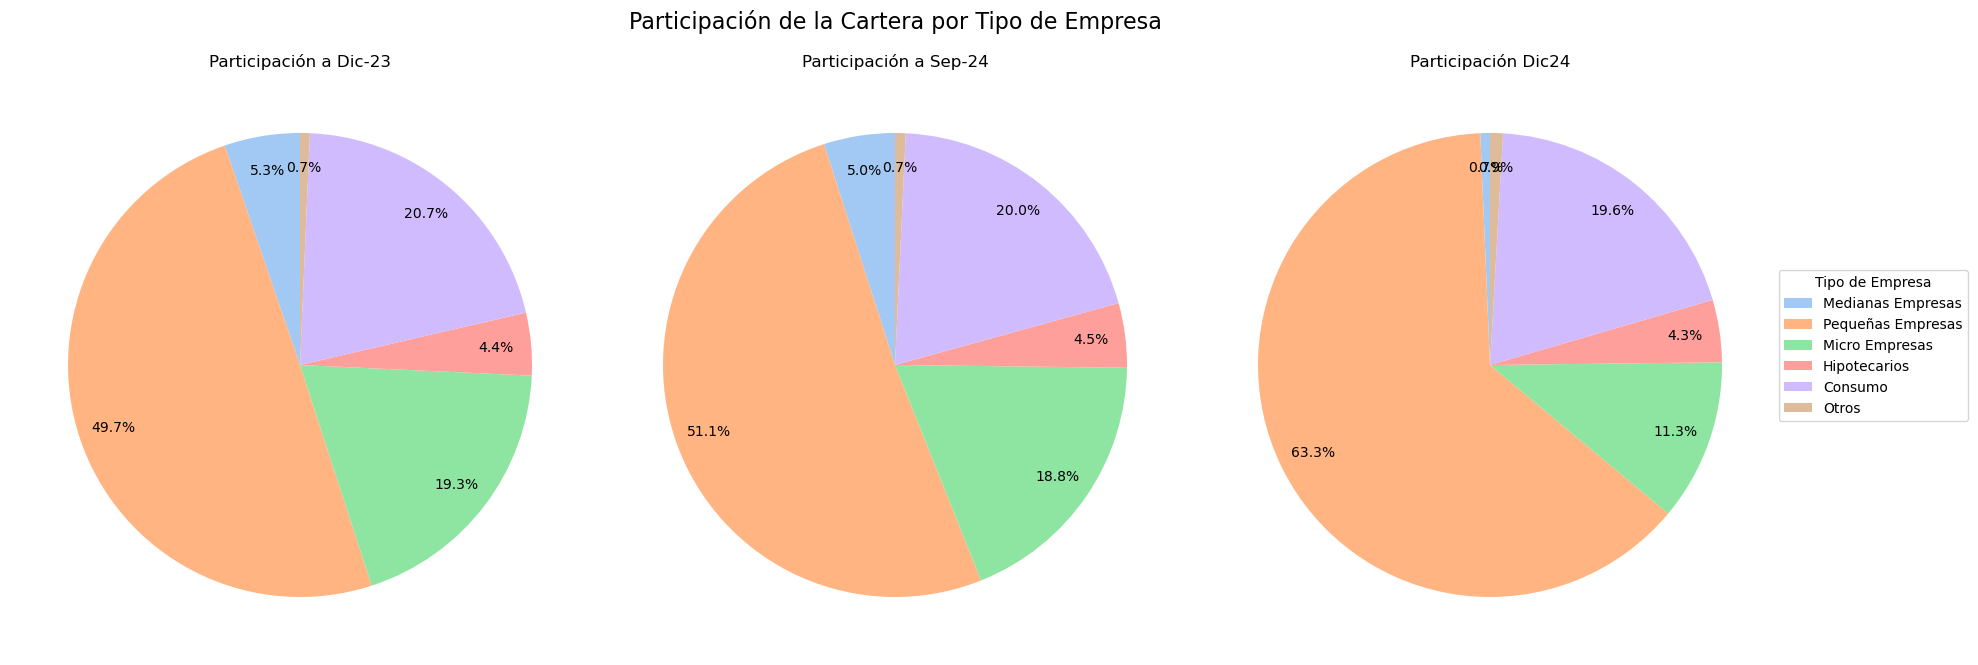

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # 1 fila, 3 columnas para los 3 gráficos
fig.suptitle('Participación de la Cartera por Tipo de Empresa', fontsize=16)

# Lista de columnas a graficar
columnas = ['Participación a Dic-23', 'Participación a Sep-24', 'Participación Dic24']

# Definir las categorías a agrupar como "Otros"
categorias_a_agrupar = ['Corporativos', 'Grandes Empresas']

# Crear un gráfico de pastel para cada columna
for i, col in enumerate(columnas):
    # Extraer los valores y las etiquetas
    valores = tabla4[col].str.replace(',', '').astype(float)  # Convertir a float
    etiquetas = tabla4['Tipo Empresa']
    
    # Agrupar las categorías específicas en "Otros"
    valores_agrupados = []
    etiquetas_agrupadas = []
    otros_valor = 0  # Acumulador para la categoría "Otros"
    
    for valor, etiqueta in zip(valores, etiquetas):
        if etiqueta in categorias_a_agrupar:
            otros_valor += valor  # Sumar al acumulador de "Otros"
        else:
            valores_agrupados.append(valor)  # Mantener el valor original
            etiquetas_agrupadas.append(etiqueta)  # Mantener la etiqueta original
    
    # Agregar "Otros" si hay valores acumulados
    if otros_valor > 0:
        valores_agrupados.append(otros_valor)
        etiquetas_agrupadas.append('Otros')
    
    # Crear el gráfico de pastel
    wedges, texts, autotexts = axes[i].pie(
        valores_agrupados,
        autopct='%1.1f%%',  # Mostrar porcentajes
        startangle=90,       # Rotar el gráfico
        colors=sns.color_palette('pastel', len(valores_agrupados)),  # Usar colores pastel
        pctdistance=0.85,    # Distancia de los porcentajes al centro
        labeldistance=None    # No mostrar etiquetas dentro del gráfico
    )
    axes[i].set_title(col)  # Título del gráfico

# Crear una sola leyenda fuera de los gráficos
fig.legend(
    wedges,                  # Elementos de la leyenda (las porciones del pastel)
    etiquetas_agrupadas,     # Etiquetas de la leyenda
    title="Tipo de Empresa", # Título de la leyenda
    loc="center right",      # Ubicación de la leyenda
    bbox_to_anchor=(1.1, 0.5)  # Ajustar posición fuera de los gráficos
)

# Ajustar el layout
a1 = plt.tight_layout()
plt.show()

##### 4. Evolución de la Morosidad

In [38]:
df.columns

Index(['FECHA', 'Caja Municipal', 'TIPO_CREDITO', 'Atrasados',
       'Refinanc. Y Reestruct.', 'Vigentes', 'SALDO', 'Numero_Deudores',
       'Normal', 'CPP', 'Deficiente', 'Dudoso', 'Pérdida', 'Miles S/',
       'Morosidad SBS'],
      dtype='object')

In [39]:
tm_dic23 = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2023-12-01')][[df.columns[14]]].iloc[0,0]
    tm_dic23[m] = analisis
tm_dic23_1 = list(tm_dic23.values())

tm_sep24 = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2024-09-01')][[df.columns[14]]].iloc[0,0]
    tm_sep24[m] = analisis
tm_sep24_1 = list(tm_sep24.values())

tm_dic24 = {}
for m in range(7):
    analisis = df[(df[df.columns[1]] == cajas[-2]) & (df[df.columns[2]] == tipo_credito[m]) & (df[df.columns[0]] == '2024-12-01')][[df.columns[14]]].iloc[0,0]
    tm_dic24[m] = analisis
tm_dic24_1 = list(tm_dic24.values())


In [40]:
#GENERAMOS TABLA DE RESULTADOS
tabla5 = pd.DataFrame({'Tipo Empresa':tipo_credito, 
                       'Morosidad Dic-23':tm_dic23_1, 
                       'Morosidad Sep-24':tm_sep24_1, 
                       'Morosidad Dic24': tm_dic24_1})

tabla5['Variacion anual'] = round(((tabla5[tabla5.columns[3]] / tabla5[tabla5.columns[1]]) - 1)*100,2)
tabla5['Variacion mensual'] = round(((tabla5[tabla5.columns[3]] / tabla5[tabla5.columns[2]]) - 1)*100,2)
tabla5[[tabla5.columns[1], tabla5.columns[2], tabla5.columns[3]]] = tabla5[[tabla5.columns[1], tabla5.columns[2], tabla5.columns[3]]].applymap(lambda x: f"{x:,.2f}")
# Convertir la columna en una categoría con el orden específico
tabla5["Tipo Empresa"] = pd.Categorical(tabla5["Tipo Empresa"], categories=orden_deseado, ordered=True)

# Ordenar el DataFrame
tabla5 = tabla5.sort_values("Tipo Empresa").reset_index(drop=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8388\2238224856.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla5[[tabla5.columns[1], tabla5.columns[2], tabla5.columns[3]]] = tabla5[[tabla5.columns[1], tabla5.columns[2], tabla5.columns[3]]].applymap(lambda x: f"{x:,.2f}")


##### La morosidad es un indicador clave para evaluar la salud financiera de las Cajas Municipales, ya que refleja la capacidad de los clientes para cumplir con sus obligaciones crediticias. En este apartado, se analiza la evolución de la morosidad en los diferentes segmentos de la cartera de créditos durante el último trimestre de 2024, considerando el impacto de la Resolución SBS N° 2368-2023. A continuación, se presenta un análisis detallado de la morosidad en los principales segmentos de la cartera de créditos:

In [42]:
tabla5

,Tipo Empresa,Morosidad Dic-23,Morosidad Sep-24,Morosidad Dic24,Variacion anual,Variacion mensual
0,Corporativos,0.00,0.00,0.00,NaN,NaN
1,Grandes Empresas,0.91,0.92,0.09,-90.61,-90.72
2,Medianas Empresas,14.03,12.47,9.89,-29.50,-20.70
3,Pequeñas Empresas,6.35,7.32,6.41,0.88,-12.47
4,Micro Empresas,4.98,5.68,8.45,69.68,48.77
5,Hipotecarios,4.05,4.31,4.33,7.02,0.50
6,Consumo,3.28,3.85,3.69,12.35,-4.12


##### 4.1 Análisis de la Morosidad por Segmento

##### - Medianas Empresas: La morosidad en este segmento disminuyó de 12.47% a 9.89%, lo que representa un disminución del 20.70%. Esta tendencia confirma una mejora significativa en la capacidad de pago de las empresas que permanecen en este segmento, posiblemente debido a una mejor gestión de riesgos y a la reclasificación de clientes con mayores dificultades financieras..

##### - Pequeñas Empresas: La morosidad en este segmento se redujo de 7.32% a 6.41%, con una variación del -12.47%. Este descenso indica una mejora en la estabilidad financiera de las pequeñas empresas, aunque es importante seguir monitoreando este segmento debido a la posible presión generada por la absorción de clientes retipificados.

##### - Microempresas: La morosidad en este segmento aumentó de 5.68% a 8.45%, con una variación del 48.77%. Este incremento es alarmante y sugiere que las microempresas están enfrentando mayores dificultades financieras, posiblemente agravadas por la reclasificación de clientes con mayores riesgos y las condiciones económicas adversas.

##### 4.2 Comparación Interanual de la Morosidad

##### - Medianas Empresas: La reducción del 29.50% en la morosidad de este segmento es un resultado positivo y refleja una mejora significativa en la capacidad de pago de las empresas que permanecen en este segmento. Sin embargo, es importante seguir monitoreando este segmento para asegurar que la mejora se mantenga a largo plazo.

##### - Pequeñas Empresas: La estabilidad en la morosidad de este segmento es un resultado alentador, pero es importante no subestimar los desafíos que podrían surgir en el futuro, especialmente debido a la absorción de clientes reclasificados desde las medianas empresas..

##### - Microempresas: El aumento del 69.68% en la morosidad de este segmento es alarmante y requiere una atención inmediata. Es fundamental implementar medidas para apoyar a estas empresas y evitar que la morosidad continúe aumentando.

#### Conclusiones

##### El análisis de la evolución de la cartera de créditos y la morosidad en las Cajas Municipales durante el último trimestre de 2024, bajo el impacto de la Resolución SBS N° 2368-2023, revela tendencias significativas en la estructura de la cartera y en la capacidad de pago de los clientes. A continuación, se presentan las conclusiones clave basadas en los datos proporcionados:

##### 1. Reclasificación de Clientes y Ajuste en la Estructura de la Cartera

##### - Migración Masiva de Medianas a Pequeñas Empresas: La disminución del saldo en el segmento de Medianas Empresas (-86.89%) y el aumento en el segmento de Pequeñas Empresas (+26.21%) confirman una migración masiva de clientes de medianas a pequeñas empresas. Esto ha generado un ajuste significativo en la estructura de la cartera, consolidando a las pequeñas empresas como el segmento dominante (63.26% de participación en diciembre 2024).

##### - Reducción en Microempresas: El saldo de Microempresas disminuyó en un 38.16%, lo que sugiere que muchos clientes de este segmento han migrado a otros segmentos o han salido del sistema financiero. Esto podría estar relacionado con la búsqueda de mejores condiciones crediticias o con la reclasificación bajo la nueva normativa.

##### 2. Impacto en la Morosidad

##### - Mejora en Medianas Empresas: La morosidad en el segmento de Medianas Empresas disminuyó significativamente, tanto trimestralmente (-20.70%) como interanualmente (-29.50%). Esto refleja una mejora en la capacidad de pago de las empresas que permanecen en este segmento, posiblemente debido a la reclasificación de clientes con mayores dificultades financieras hacia otros segmentos y a una mejor gestión de riesgos por parte de las Cajas Municipales.

##### - Estabilidad en Pequeñas Empresas: A pesar de la absorción de clientes reclasificados, la morosidad en el segmento de Pequeñas Empresas se redujo ligeramente (-12.47% trimestralmente) y se mantuvo estable interanualmente (+0.88%). Esto indica que las pequeñas empresas están gestionando adecuadamente sus obligaciones, aunque es importante monitorear este segmento debido a la presión generada por la migración de clientes.

##### - Aumento Alarmante en Microempresas: La morosidad en el segmento de Microempresas aumentó significativamente, tanto trimestralmente (+48.77%) como interanualmente (+69.68%). Este incremento es preocupante y sugiere que las microempresas están enfrentando mayores dificultades financieras, posiblemente agravadas por la reclasificación de clientes con mayores riesgos y las condiciones económicas adversas.